# COVID-19 Confirmed cases time series graph

Data Source: https://github.com/CSSEGISandData/COVID-19 (John hopkins dataset) <br>Import data from source into dataframe

In [1]:
import pandas as pd
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
df = pd.read_csv(url, error_bad_lines=False)
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,3392,3563,3778,4033,4402,4687,4963,5226,5639,6053
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,832,842,850,856,868,872,876,880,898,916
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,4997,5182,5369,5558,5723,5891,6067,6253,6442,6629
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,751,752,752,754,755,755,758,760,761,761
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,36,36,43,43,45,45,45,45,48,48


Drop not useful columns

In [2]:
df.drop(['Province/State','Lat','Long'],axis=1,inplace=True)

Some countries have data broken down into provinces in the source data (Multiple rows are present for some countires in sorce data).We need to aggregate numbers of those countires into a single record.

Finding out the Countires to be aggregated by using value_counts()

In [3]:
vc = df['Country/Region'].value_counts() 

In [4]:
Countries_to_be_agg = vc[vc > 1].index

In [5]:
agg_df=pd.DataFrame()

Selecting the records of the countries to be aggregated from source df

In [6]:
agg_country_df = df[df['Country/Region'].isin(Countries_to_be_agg)]

Aggeragated countries data and put the aggregated data into agg_df

In [7]:
for i in range(len(Countries_to_be_agg)):
    temp_df = agg_country_df[agg_country_df['Country/Region']==Countries_to_be_agg[i]]
    temp = temp_df.sum(axis=0)
    temp['Country/Region'] = Countries_to_be_agg[i]
    agg_df = agg_df.append(temp,ignore_index = True)

Dropping the Countries to be aggregated records from original df

In [8]:
for i in range(len(Countries_to_be_agg)):
    df.drop(df[df['Country/Region'] == Countries_to_be_agg[i]].index,inplace=True)
df

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,3392,3563,3778,4033,4402,4687,4963,5226,5639,6053
1,Albania,0,0,0,0,0,0,0,0,0,...,832,842,850,856,868,872,876,880,898,916
2,Algeria,0,0,0,0,0,0,0,0,0,...,4997,5182,5369,5558,5723,5891,6067,6253,6442,6629
3,Andorra,0,0,0,0,0,0,0,0,0,...,751,752,752,754,755,755,758,760,761,761
4,Angola,0,0,0,0,0,0,0,0,0,...,36,36,43,43,45,45,45,45,48,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Sao Tome and Principe,0,0,0,0,0,0,0,0,0,...,174,187,208,208,208,208,208,220,235,235
262,Yemen,0,0,0,0,0,0,0,0,0,...,25,25,34,34,51,56,65,70,85,106
263,Comoros,0,0,0,0,0,0,0,0,0,...,8,8,8,11,11,11,11,11,11,11
264,Tajikistan,0,0,0,0,0,0,0,0,0,...,379,461,522,612,612,661,729,801,907,1118


Merging  original df and agg_df and perform some preprocessing

In [9]:

cols = agg_df.columns.tolist()
cols = cols[-1:] + cols[:-1]
agg_df = agg_df[cols]

df = pd.concat([df, agg_df], axis=0,sort=False)

df.set_index('Country/Region',inplace=True)

df = df.T



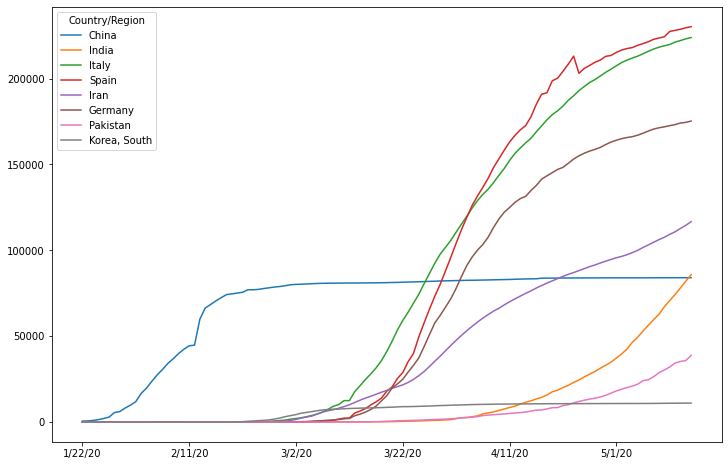

In [10]:
Countries_to_be_plotted = ['China','India','Italy','Spain','Iran','Germany','Pakistan','Korea, South']
df[Countries_to_be_plotted].plot(figsize=(12,8))

Generating time series graph using bar race chart

![title](img/time_series.png)

In [11]:
from IPython.display import HTML
import bar_chart_race as bcr
html = bcr.bar_chart_race(df.iloc[30:,:],label_bars=True,
    use_index=True,filename='covid19_horiz_desc.mp4',
    steps_per_period=10,
    period_length=500,
    cmap='dark24',bar_label_size=7,
    tick_label_size=7,
    period_label_size=16,
    fig=None,
    figsize= (5.5, 3.5),n_bars=12, title='COVID-19 Confirmed cases by Country')
HTML(html)

NameError: name 'bcr' is not defined

In [ ]:
HTML("""
<video width="840" height="460" controls="">
<source src="{0}">
</video>
""".format("video/covid19_horiz_desc.mp4"))